Import libraries

In [1]:
from RiccardoWorkSpace.Strategy import Strategy
from RiccardoWorkSpace.RiskCost import RiskCostFunction
from RiccardoWorkSpace.AlgorithmLibrary import BFSPathSearch

from JacopoWorkSpace.LibraryJacopo import Map, CreateLevel1, CreateLevel2, CreateLevel3

from SelormWorkSpace.MovingLibrary import Moving

Choose level get the map and create joystick

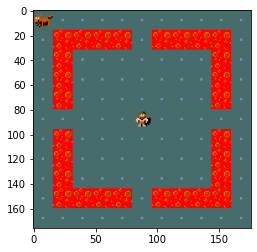

In [2]:
MapGame, Enviroment = CreateLevel1()
#MapGame, Enviroment = CreateLevel2()
#MapGame, Enviroment = CreateLevel3()

Joystick = Moving(Enviroment)

Stategy and successor function

In [3]:
def SuccessorFunction(Point):
    
    Result = [(Point[0]-1, Point[1]-1), (Point[0]+1, Point[1]-1),  (Point[0], Point[1]-1),
              (Point[0]-1, Point[1]),   (Point[0]+1, Point[1]),    
              (Point[0]-1, Point[1]+1), (Point[0]+1, Point[1]+1),  (Point[0], Point[1]+1)]
    
    return list(filter(lambda i: MapGame.get_position_symbol(i[0], i[1]) in ["."], Result))

StrategyLogic = Strategy(SuccessorFunction, BFSPathSearch(SuccessorFunction), RiskCostFunction(SuccessorFunction))
StrategyLogic.ActualGoal = (5, 34)  #<--------- Target

Safety First euristhic

Paths calculated: 
NextMovePositionMonsters: set()
NextMoveDangerPoints: set()
Possible choices to consider:
(9, 38)
(11, 38)
(10, 38)
(9, 39)
(11, 39)
(9, 40)
(11, 40)
(10, 40)
Paths to consider:
Path chosen [(10, 39), (9, 40)]
(10, 39) --> (9, 40)


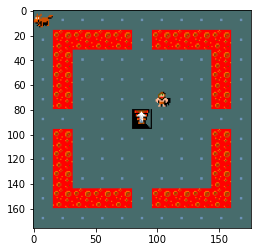

Paths calculated: 
NextMovePositionMonsters: set()
NextMoveDangerPoints: set()
Possible choices to consider:
(8, 39)
(9, 39)
(8, 40)
(10, 40)
(8, 41)
(10, 41)
(9, 41)
Paths to consider:
Path chosen [(9, 40), (8, 41)]
(9, 40) --> (8, 41)


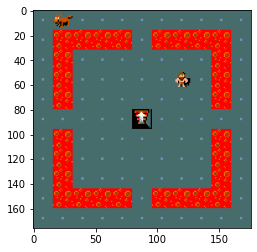

TypeError: object of type 'method' has no len()

In [4]:
while(True):
    
    CharacterPosition = MapGame.get_player_location()
    MonsterPositions = MapGame.get_monsters_location()
    
    if CharacterPosition==StrategyLogic.ActualGoal:
        print("Target reached!")
        break

    else:
        
        NextStep = StrategyLogic.Calculate(CharacterPosition, MonsterPositions)

        print("Path chosen", StrategyLogic.GetActualPath())
        print(f"{CharacterPosition} --> {NextStep}")
        
        NewState = Joystick.Move(CharacterPosition, NextStep)
        MapGame = Map(NewState)
    
        MapGame.view_map()
